### Defining a model evaluation metrics function


In [2]:
def model_eval(obs,pred):

    import numpy as np
    from sklearn import linear_model
    
    if obs.shape != pred.shape:
        print('flattening arrays')
        obs = obs.flatten()
        pred = pred.flatten()
        
    # Handle NaNs and Infs - ADDED RMM 8.3.2020 to handle NaNs and Infs
    nan_pred_mask = np.isnan(pred) | np.isinf(pred)
    if np.any(nan_pred_mask):
        not_nan_pred_mask = ~nan_pred_mask
        pred = pred[not_nan_pred_mask]
        obs = obs[not_nan_pred_mask]
        
#     from sklearn import metrics
    MAE = 1./len(obs) * (np.sum( np.abs(obs - pred) ))
#     MAE = metrics.mean_absolute_error(obs,pred)
    MSE = 1./len(obs) * (np.sum( (obs - pred)**2 ))
#     MSE = metrics.mean_squared_error(obs,pred)
    RMSE = np.sqrt(MSE)
    RAE = (np.sum( np.abs(obs - pred) )) / (np.sum( np.abs(obs - np.mean(obs)) ))
    RSE = (np.sum( (obs - pred)**2 )) / (np.sum( (obs - np.mean(obs))**2 ))
    RSQ = 1-RSE
#     RSQ = metrics.r2_score(obs,pred)
#     NOTE: Prediction efficiency and R-squared are the same thing
#     PE = 1 - ( (np.sum(pred - obs))**2 ) / ( (np.sum(obs - np.nanmean(obs)))**2 )
    regr = linear_model.LinearRegression()
    regr.fit(obs.reshape(-1, 1),pred)
    lin_slope = regr.coef_[0]
    lin_intercept = regr.intercept_
    

    print('Evaluation: \n')
    print('   MAE  = {}'.format(MAE))
    print('   MSE  = {}'.format(MSE))
    print('   RMSE = {}'.format(RMSE))
    print('   RAE  = {}'.format(RAE))
    print('   RSE  = {}'.format(RSE))
    print('   RSQ  = {}'.format(RSQ))
#     print('   PE  = {}'.format(PE))
    print('   linear slope  = {}'.format(lin_slope))
    print('   linear intercept  = {}'.format(lin_intercept))
    
    return MAE, MSE, RMSE, RAE, RSE, RSQ, lin_slope, lin_intercept

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


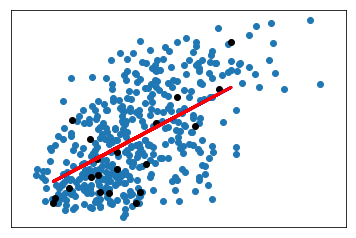

In [11]:
# # Testing the linear fit functionality of the function above

# from sklearn import datasets, linear_model
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import mean_squared_error, r2_score
    
# # Load the diabetes dataset
# diabetes = datasets.load_diabetes()


# # Use only one feature
# diabetes_X = diabetes.data[:, np.newaxis, 2]

# # Split the data into training/testing sets
# diabetes_X_train = diabetes_X[:-20]
# diabetes_X_test = diabetes_X[-20:]

# # Split the targets into training/testing sets
# diabetes_y_train = diabetes.target[:-20]
# diabetes_y_test = diabetes.target[-20:]

# # Create linear regression object
# regr = linear_model.LinearRegression()

# plt.figure()
# plt.scatter(diabetes_X_train,diabetes_y_train)

# # Train the model using the training sets
# regr.fit(diabetes_X_train, diabetes_y_train)

# # Make predictions using the testing set
# diabetes_y_pred = regr.predict(diabetes_X_test)

# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f"
#       % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# # Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
# plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
# plt.plot(diabetes_X_test, diabetes_X_test*regr.coef_ + regr.intercept_, '-.', color='red', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()



In [22]:
# model_eval(diabetes_y_test,diabetes_y_pred)

Evaluation: 

   MAE  = 41.22709128976146
   MSE  = 2548.07239872597
   RMSE = 50.478434986892864
   RAE  = 0.7215101730794795
   RSE  = 0.5274245520177285
   RSQ  = 0.47257544798227147
   PE  = -6.630079274986685e+31
   linear slope  = 0.4598381320767749
   linear intercept  = 85.52527409006767


(41.22709128976146,
 2548.07239872597,
 50.478434986892864,
 0.7215101730794795,
 0.5274245520177285,
 0.47257544798227147,
 -6.630079274986685e+31)